<a href="https://colab.research.google.com/github/MatthewReid854/reliability/blob/master/notebooks/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before we start, reliability needs to be installed as it does not (yet) come standard in google colab.

If you modify a code block or create a new code block, you can run it by clicking the run arrow on the left. The run arrow will appear when you move your mouse over the [X] brackets.

In [1]:
!pip install reliability -q

     |████████████████████████████████| 143kB 2.9MB/s 


Within reliability all probability distributions are created as objects. This means that once we have created the distribution, we can do lots of things, such as plot it, find its properties (mean, median, variance, etc.), draw random samples, and much more.

Let's start by creating a Weibull Distribution. You can find all the available distributions in the reliability.Distributions module.

In [2]:
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt
dist = Weibull_Distribution(alpha=5,beta=2)

Now that we have our Weibull Distribution stored in the variable "dist", let's see how we can access the mean and plot the PDF.

The mean is: 4.4311346272637895


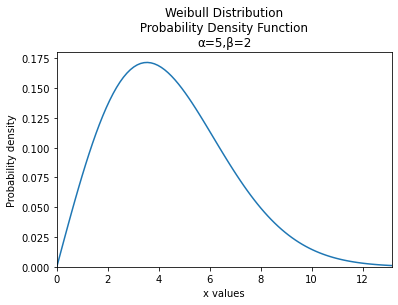

In [3]:
print('The mean is:',dist.mean)
dist.PDF() # this plots the PDF
plt.show() # this shows the plot

In addition to creating distributions from parameters, we might need to fit a distribution to data. In the next code block we will generate some data from our Weibull Distribution and then try and fit a new Weibull Distribution to that data.

Results from Fit_Weibull_2P (95% CI):
           Point Estimate  Standard Error  Lower CI  Upper CI
Parameter                                                    
Alpha             4.81673        0.265844  4.322877  5.367001
Beta              1.89937        0.152381  1.623006  2.222794
Log-Likelihood: -221.84449636819969 



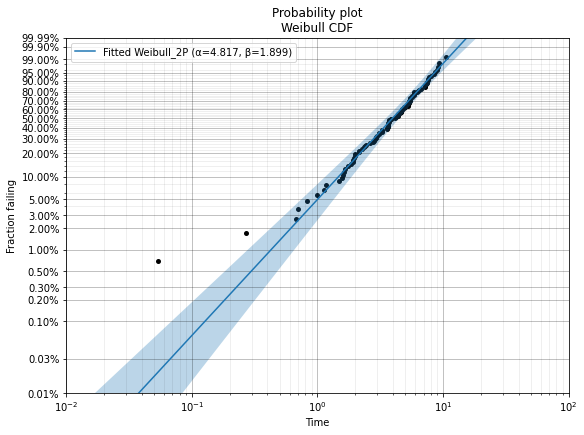

In [4]:
data = dist.random_samples(number_of_samples=100,seed=1) #the seed just keeps the results consistent
from reliability.Fitters import Fit_Weibull_2P
fitted_result = Fit_Weibull_2P(failures=data) #this will display the results of the fitter and also show the probability plot

Perhaps we are interested in plotting the survival function (also known as the reliability function) of our result alongside the original distribution. We can do that by accessing the distribution object created by the Fitter as follows.

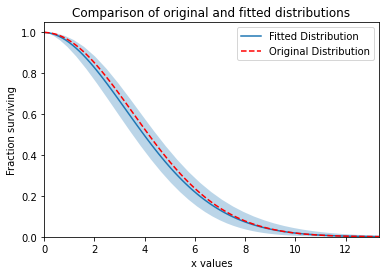

In [5]:
import matplotlib.pyplot as plt #we need to import matplotlib.pyplot in order to change the plot title and legend
fitted_result.distribution.SF(label='Fitted Distribution')
dist.SF(label='Original Distribution', linestyle='--', color='red')
plt.title('Comparison of original and fitted distributions')
plt.legend()
plt.show()

You will find lots more examples in the online documentation available here: https://reliability.readthedocs.io/en/latest/